In [13]:
import torch
from torch.autograd import Variable

## DATASET

In [14]:
dataset = [] #list of tuples (image, label)

zer = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

one = torch.Tensor([[0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1],
                   ])

two = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                   ])

thr = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

fou = torch.Tensor([[0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

fiv = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

six = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

sev = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

eig = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

nin = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

dataset.append((zer, torch.Tensor([0])))
dataset.append((one, torch.Tensor([1])))
dataset.append((two, torch.Tensor([2])))
dataset.append((thr, torch.Tensor([3])))
dataset.append((fou, torch.Tensor([4])))
dataset.append((fiv, torch.Tensor([5])))
dataset.append((six, torch.Tensor([6])))
dataset.append((sev, torch.Tensor([7])))
dataset.append((eig, torch.Tensor([8])))
dataset.append((nin, torch.Tensor([9])))



### Take a look into how the data looks like

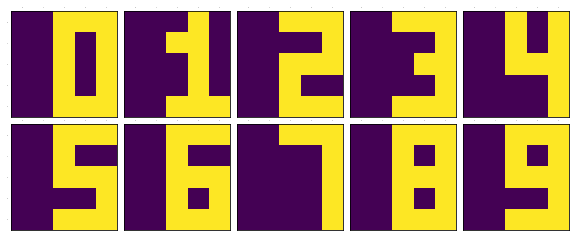

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

fig = plt.figure(1,(10., 50.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (data, target) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(data.numpy()))
    grid[i].tick_params(axis='both', which='both', length=0, labelsize=0)
plt.show()

## MODEL

In [16]:
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.output_layer = nn.Linear(5*5, 10, bias=False)

    def forward(self, x):
        x = self.output_layer(x)
        return F.log_softmax(x)
    

In [17]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=1, momentum=0.1)

### DATASET - MODEL - OUTPUT

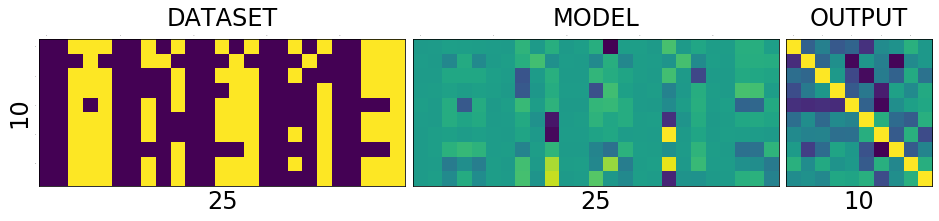

In [70]:
fig = plt.figure(1, (16., 16.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.1)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target).squeeze()
grid[0].matshow(Image.fromarray(data.numpy()))
grid[0].set_title('DATASET', fontsize=24)
grid[0].set_ylabel('10', fontsize=24)
grid[0].set_xlabel('25', fontsize=24)
grid[0].tick_params(axis='both', which='both', length=0, labelsize=0)

grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
grid[1].set_title('MODEL', fontsize=24)
grid[1].set_xlabel('25', fontsize=24)
grid[1].tick_params(axis='both', which='both', length=0, labelsize=0)


output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))
grid[2].set_title('OUTPUT', fontsize=24)
grid[2].set_xlabel('10', fontsize=24)
grid[2].tick_params(axis='both', which='both', length=0, labelsize=0)




plt.show()

Lets try to understand what is in the picture above. 

The first one is the collection of all the data that we have. 
The second one is the matrix of weights connecting the input of 25 input neurons to 10 output neurons.
And the last one we will get to it little later.

###### What is special about 25 and 10 here? 
Nothing. Our dataset is a set of images of numbers each having a size of 5x5 ==> 25. And we have how many different numbers a hand? 0,1,2...9 ==> 10 numbers or 10 different classes of output(this will become clear in the next post)

I can hear you screaming,

"no no  no, get back to the dataset? What is that weird picture on the left, having weird 
zero in the top-left,
and three on the bottom-right
and some messed up fours and eights in the middle."

Let get to it. Look the picture below.

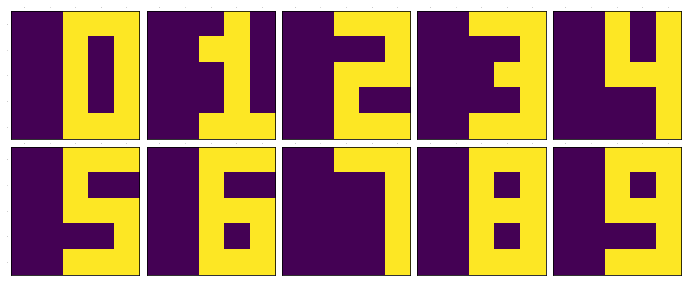

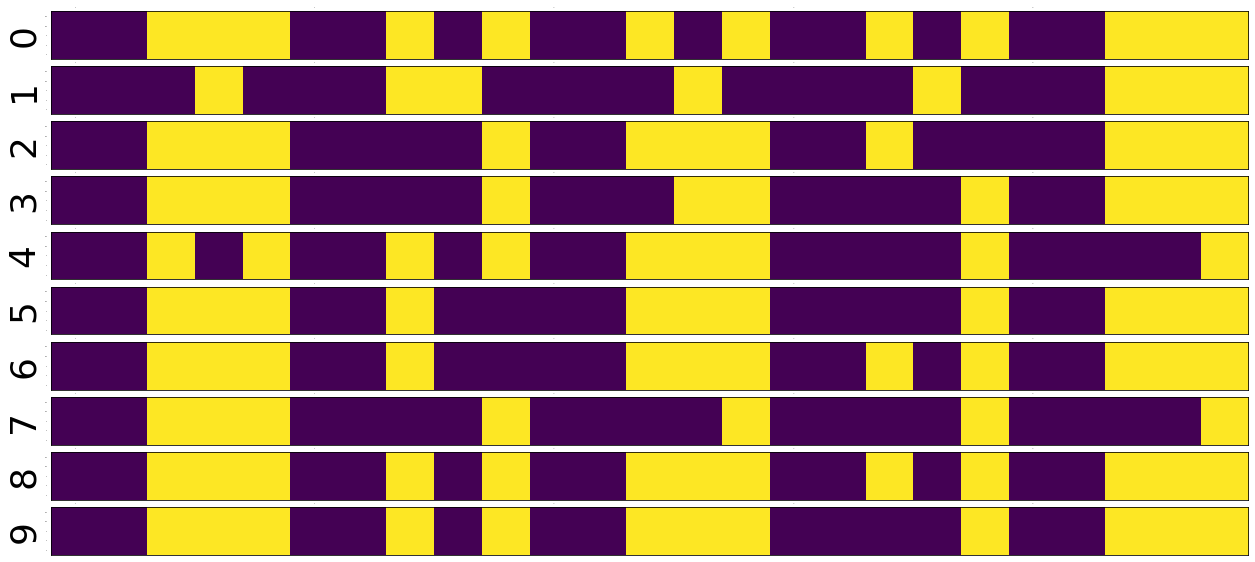

In [72]:
fig = plt.figure(1,(12., 12.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (d, t) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(d.numpy()))
    grid[i].tick_params(axis='both', which='both', length=0, labelsize=0)
    
plt.show()

fig = plt.figure(1, (100., 10.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(dataset), 1),
                     axes_pad=0.1)


data = [data.view(1, -1) for data, target in dataset]

for i, d in enumerate(data):
    grid[i].matshow(Image.fromarray(d.numpy()))
    grid[i].set_ylabel('{}'.format(i), fontsize=36)
    grid[i].tick_params(axis='both', which='both', length=0, labelsize=0)

Voila!! We have just arranged the image matrix into a vector. The reason is it reduces the computational complexity to a little and makes it easier to operate over mutiple samples of data at the same time. We saw that the model - matrix which connects the 25 input neurons to 10 output neurons. So we cannot keep the input images as matrices , if we do, then the result of matrix multiplication is not same as the output of the neural network which looks at all the pixels of the image and say how similar the input image is to the classes of numbers. 

This is important to remember, **a simple neural network looks at the input and try to figure out which class does this input belong to** 

in our case inputs are the images of numbers, and outputs are how similar are the classes to the input. Th output neuron with highest value is more closer to the input and the output neuron with least value is very NOT similar to the input.

For example after training, if we feed the image of number 3, the output neurons corresponding to 3, 8, 9 and probably 7 will have larger values and the output neurons corresponding to 1 and 6 will have the least value. Don't worry if you don't understand why, it will become clearer as we go on.  

#### How many correct predictions without any training

Too much theory, lets get our hands dirty. Let see how many numbers did our model predicted correctly.

In [20]:
# Remember that output = model(Variable(data))
pred = output.data.max(1)[1].squeeze()    
print(pred.size(), target.size())
correct = pred.eq(target.long()).sum()
print('correct: {}/{}'.format(correct, len(dataset)))

torch.Size([10]) torch.Size([10])
correct: 1/10


#### NONE out of TEN
That is right it predicted none out of ten. We feeded our network with all of our data and asked it to figure what is the number that is in the image. Remember what we learned earlier about output neurons. The neural network tell us which number is present in the image by lighting up that corresponding neuron. Lets say if gave 6, the network will light up the 6th neuron will be the brightest, i.e the 6th neurons value will be the highest compared to all other neurons. 

But our network above lit up wrong bulbs, for all the output. None out of ten. But why? Isn't neural network are supposed to smarter? Well yes and no. That is the difference between traditional image processing algorithms and neural networks. 

Wait, let me tell you a story, that I heard. During the second world war, there were skilled flight spotter. Their job was to spot and report if any air craft was approaching. As the war got intense, there was need for more spotters and there were lot of volunteers even from schools and colleges but there was very little time to train them. So the skilled spotters, listed out a set of things to look for in the enemy flights and asked the new volunteers to memorize them as part of the training. But the volunteers never got good at spotting. Ooosh, we will continue the story later, lets get back to the point. 

In classical image processing systems, we humans think, think and think and think a lot more and come up a set of rules or instructions, just like those skilled spotters. We give those instructions to the system, to make it understand how to process the images to extract information(called features - things to look for in the enemy flight) from them, and then use that information to make further decisions, such predicting what number is in the image. We feed that system with knowledge first before asking it to do anything for us. 

But did we feed any knowledge to network? We just told it the input size is 25 and output size is 10. How can you expect someone to guess what is in your hand, by just telling them its size. That is rude of you. Shame on you. Okay okay. How do we make the system more knowledgable about the input? Training. The holy grail of deep learning. 

### What is training?
We know that the knowledge of the neural network is in the weights of the connections - represented as matrix above. We also know that by multiplying this matrix by an input image vector we will get an output which is a set of scores that describes, how similar the input is to the output neurons.  

Imagine giving random values to the weights and feed the network with our data and see whether it predicts all our numbers correctly. If it did, fine and dandy, but if not give random values to the weights again and repeat the process until our network predicts all the numbers correctly. That is training in most simple form. 

But think about how long will it take to find such random magical values for every weight in the network to make it work as expected. We don't know that for sure. right? You wanna continue the story. don't you? Alright. 

The skilled people tried as much as they can to identify the distinguishing features of the home and enemy air crafts and tried to make the volunteers understand them. It never worked. Then they changes the strategy. They put them on the job and made them learn themselves. i.e every skilled spotter will have ten volunteers and whenever an aircraft is seen, the volunteers will shout the kind of the plane, say 'german'. Then the skilled one, will reveal the correct answer. This technique was extrememly sucessful, a spotter sent in an emergency message not only identifying it as a German aircraft, but also the correct make and model..[more](http://www.colebrookhistoricalsociety.org/PDF%20Images/Air%20Spotters%20of%20WWII.pdf) 

Hey, why don't we try the same with our network? Lets feed the images into it and shout the answer into its tiny little output neurons so that it can update its weights by itself. Now I know you're asking how can we expect, a dumb network which cannot even predict a number in an image to train itself? Well that is where it gets interesting. I must now ask you to read backpropogation algorithm to understand how the training works. Take your time, this is at the heart of deep learning and neural networks. I suggest Michael Nielson's [book](http://neuralnetworksanddeeplearning.com/chap2.html)

So now you understand why it predicted none out of ten correctly.

### lets combine the above two blocks and make a function out of it

In [83]:
def test_and_print(model, dataset, plot=True):
      
    data = [data.view(-1) for data, target in dataset]
    data = torch.stack(data).squeeze()

    target = [target.view(-1) for data, target in dataset]
    target = torch.stack(target).squeeze()
    output = model(Variable(data))
        
    loss = F.nll_loss(output, Variable(target.long()))
    
    dataset_img = Image.fromarray(data.numpy())
    model_img   = Image.fromarray(model.output_layer.weight.data.numpy())
    output_img  = Image.fromarray(output.data.numpy())
    
    pred = output.data.max(1)[1] 
    correct = pred.eq(target.long()).sum()
    
    if plot:
        fig = plt.figure(1,(16., 16.))
        grid = ImageGrid(fig, 111,
                         nrows_ncols=(1 , 3),
                         axes_pad=0.1)

        grid[0].matshow(dataset_img)
        grid[0].set_title('DATASET', fontsize=24)
        grid[0].tick_params(axis='both', which='both', length=0, labelsize=0)
        grid[0].set_ylabel('10', fontsize=24)
        grid[0].set_xlabel('25', fontsize=24)

        grid[1].matshow(model_img)
        grid[1].set_title('MODEL', fontsize=24)
        grid[1].tick_params(axis='both', which='both', length=0, labelsize=0)
        grid[1].set_xlabel('25', fontsize=24)
        
        grid[2].matshow(output_img)
        grid[2].set_title('OUTPUT', fontsize=24)
        grid[2].tick_params(axis='both', which='both', length=0, labelsize=0)
        grid[2].set_xlabel('10', fontsize=24)
        
        plt.show()    
        
    print('correct: {}/{}, loss:{}'.format(correct, len(dataset), loss.data[0]))
        
    return dataset_img, model_img, output_img 

### Lets take a closer look at DATASET - MODEL - OUTPUT 
*with help from, https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib*

and understand what those colors mean.

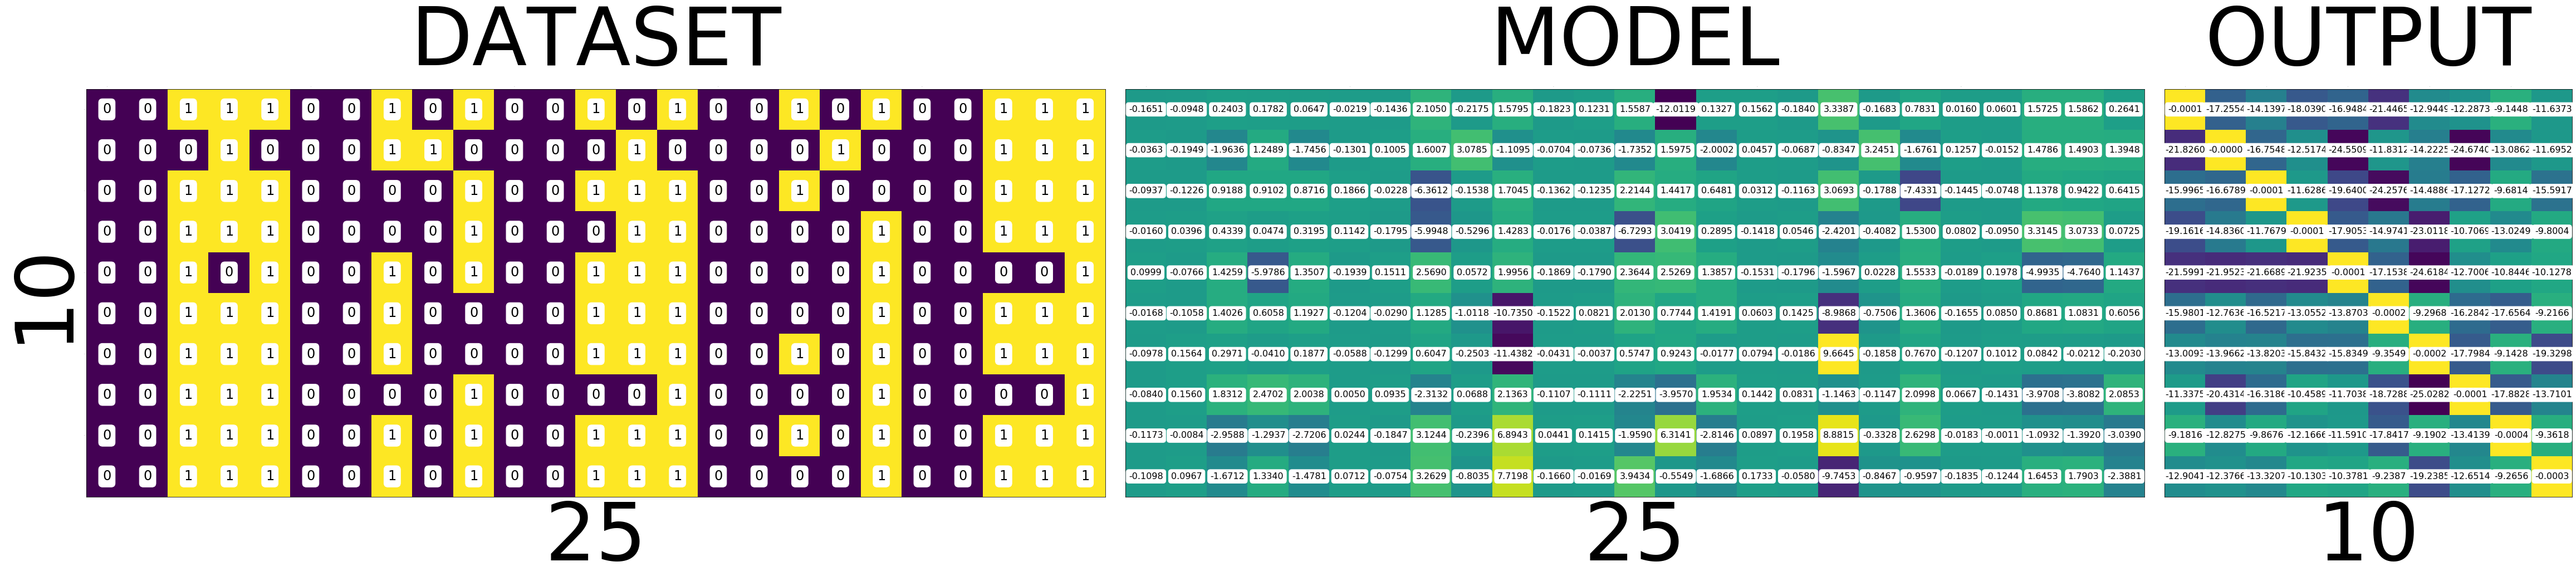

In [85]:
import numpy
fig = plt.figure(1, (80., 80.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.5)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target)

grid[0].matshow(Image.fromarray(data.numpy()))
grid[0].set_title('DATASET', fontsize=144)
grid[0].tick_params(axis='both', which='both', length=0, labelsize=0)
grid[0].set_ylabel('10', fontsize=144)
grid[0].set_xlabel('25', fontsize=144)
for (x,y), val in numpy.ndenumerate(data.numpy()):
     grid[0].text(y, x, '{:d}'.format(int(val)), ha='center', va='center', fontsize=24,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

        
grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
grid[1].set_title('MODEL', fontsize=144)
grid[1].tick_params(axis='both', which='both', length=0, labelsize=0)
grid[1].set_xlabel('25', fontsize=144)
for (x,y), val in numpy.ndenumerate(model.output_layer.weight.data.numpy()):
     grid[1].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))
grid[2].set_title('OUTPUT', fontsize=144)
grid[2].tick_params(axis='both', which='both', length=0, labelsize=0)
grid[2].set_xlabel('10', fontsize=144)

for (x,y), val in numpy.ndenumerate(output.data.numpy()):
     grid[2].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


plt.show()

If you zoom in the picture you will see numbers corresponding to the colors - violet means the lowest value, and yellow is the highest values. i.e violet does not mean 0 and yellow does not mean 1 as you might think from the dataset image. Take look at the following. It shows a single row from the output image. Go on pick the darkest square in the output above. First row itself has the darkeset one right, corresponding to number 0, i.e *data[0]*  the least value from that row is  **-3.2037**

In [ ]:
print(model(Variable(data[9].view(1, -1))))

Similarly the brightest yellow is in the second last row, corresonding to number 8 whose value is **-1.3997** you can see below. The reason I am stressing about this fact is, this is will influence how we interpret the following images. 


In [132]:
print(model(Variable(data[9].view(1, -1))))

IndexError: index 9 is out of range for dimension 0 (of size 5)

In [130]:
import numpy
def plot_with_values(model, dataset):
    fig = plt.figure(1, (80., 80.))
    grid = ImageGrid(fig, 111,
                         nrows_ncols=(1, 3),
                         axes_pad=0.5)


    data = [data.view(-1) for data, target in dataset]
    data = torch.stack(data)

    target = [target.view(-1) for data, target in dataset]
    target = torch.stack(target)

    plot_data = [data, model.output_layer.weight.data, model(Variable(data)).data]
    for i, tobeplotted in enumerate(plot_data):
        grid[i].matshow(Image.fromarray(tobeplotted.numpy()))
        grid[i].tick_params(axis='both', which='both', length=0, labelsize=0)
        for (x,y), val in numpy.ndenumerate(tobeplotted.numpy()):
            if i == 0: spec = '{:d}';  val = int(val)
            else: spec = '{:0.2f}'
            grid[i].text(y, x, spec.format(val), ha='center', va='center', fontsize=16,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))
        
    grid[0].set_title('DATASET', fontsize=144)
    grid[0].set_ylabel('10', fontsize=144)
    grid[0].set_xlabel('25', fontsize=144)

    grid[1].set_title('MODEL', fontsize=144)
    grid[1].set_xlabel('25', fontsize=144)

    grid[2].set_title('OUTPUT', fontsize=144)
    grid[2].set_xlabel('25', fontsize=144)

    plt.show()

### What does each row mean?

##### DATASET
numbers, each row is a number. first one is 0 second one is 1 and so on.
##### MODEL
weights corresponding to pixels in the image for a number. first row is for 0 and last one is for 9.
##### OUTPUT
scores of similarity. relative resemblance of the input number to all output numbers. First row contains scores of 0, how similar it is to all other numbers first square in the first row is how simlilar 0 is to 0, second square similar it is to 1. Now the scores are not only incorrect but stupid. This will become better and clear as we train the network. Lets take look at the DATASET-MODEL-OUTPUT trinity once again before training


### Before Training


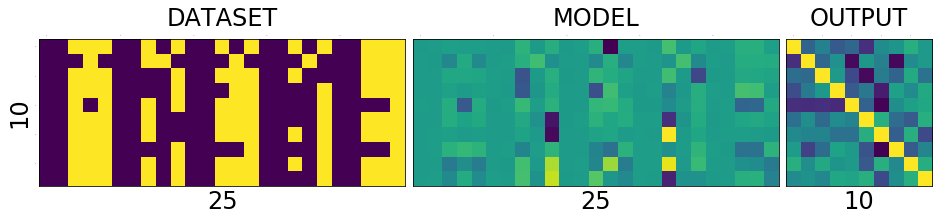

correct: 10/10, loss:7.232431380543858e-05


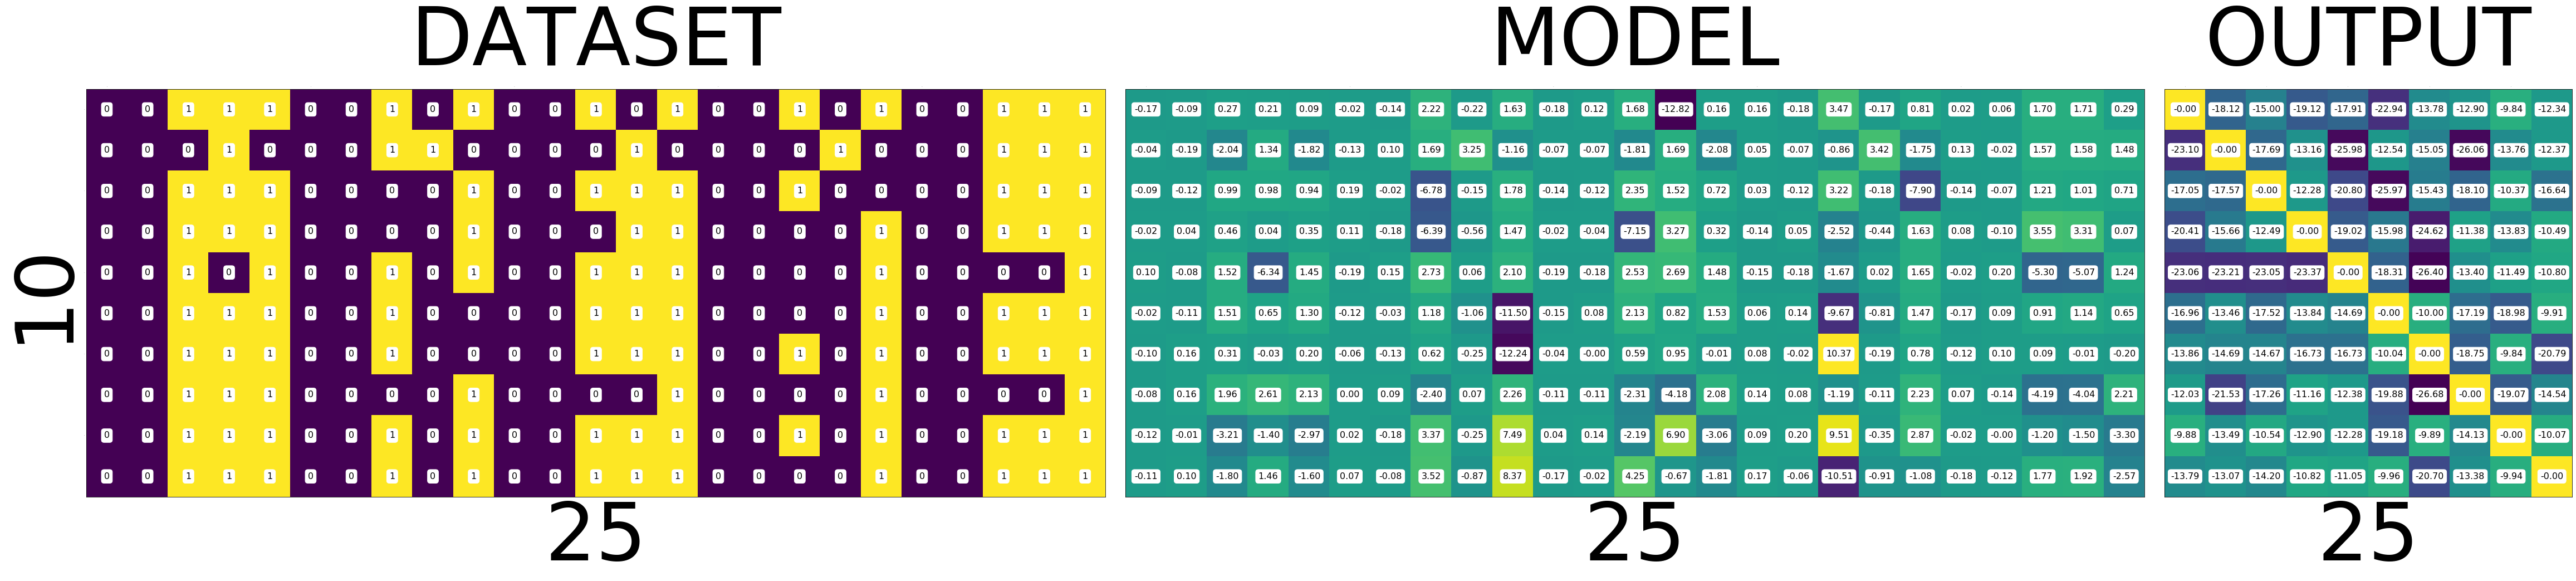

In [131]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

## Training

#### Train for a single epoch

Training for a single epoch means run over all the ten images we have now.

In [27]:
def train(model, optim, dataset):
    model.train()
    avg_loss = 0
    for i, (data, target) in enumerate(dataset):
        data = data.view(1, -1)
        data, target = Variable(data), Variable(target.long())
        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        avg_loss += loss.data[0]
        
    return avg_loss/len(dataset)

#### Train the model once and see how it works

In [28]:
train(model, optimizer, dataset)

7.552948069572449

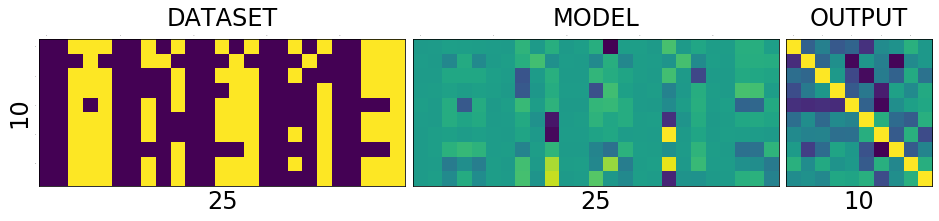

correct: 10/10, loss:0.00014499104872811586


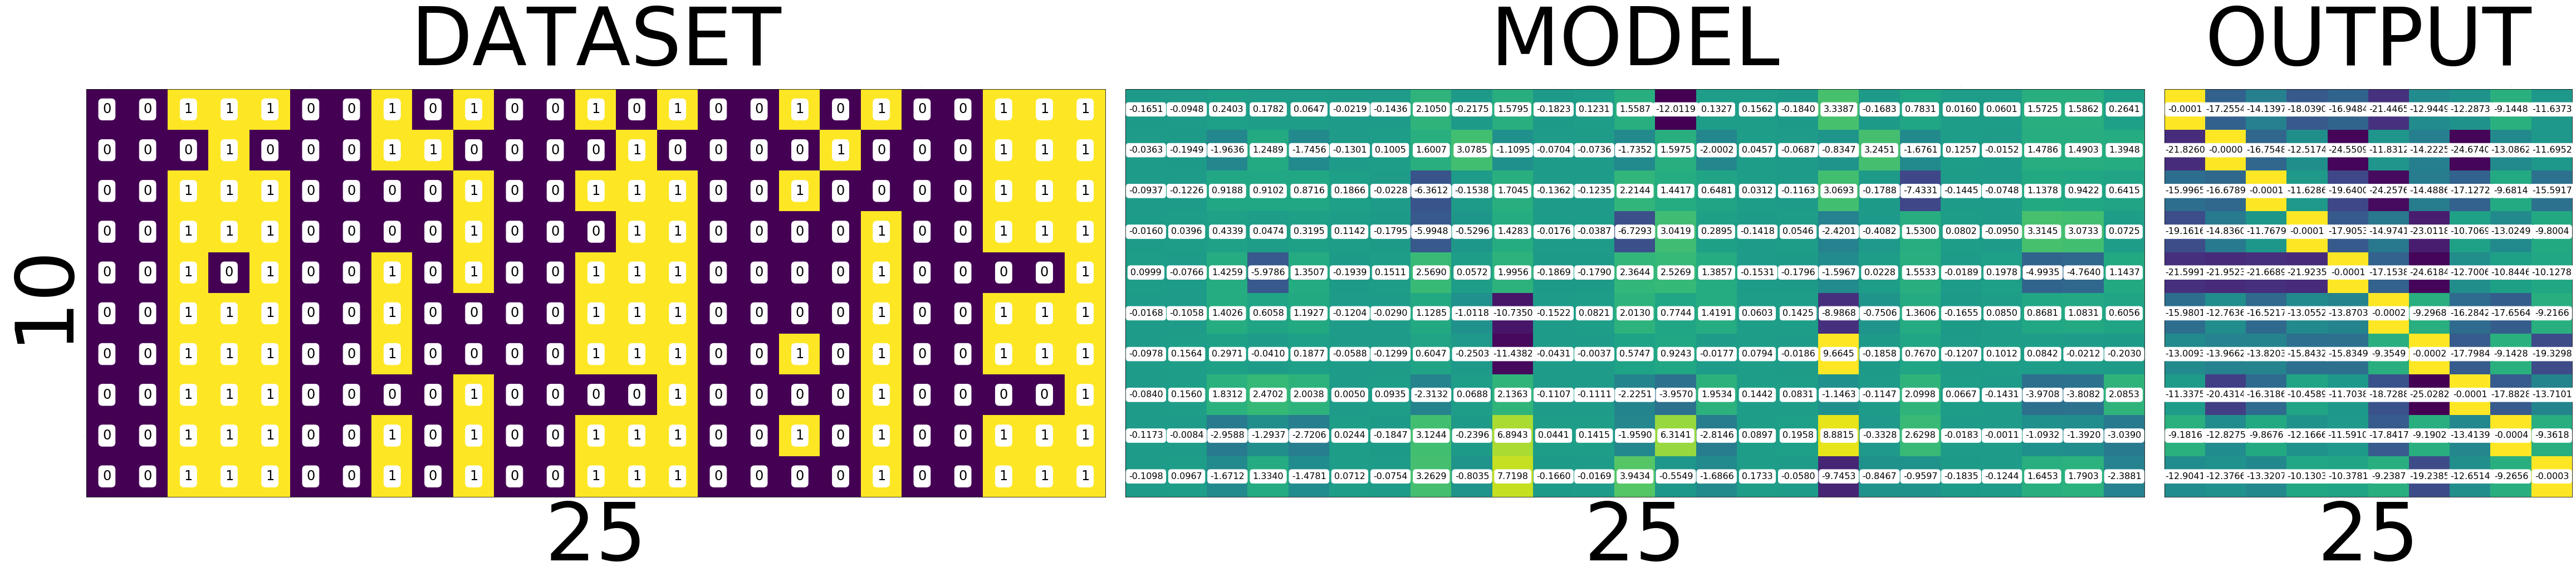

In [90]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

#### train once again

In [30]:
train(model, optimizer, dataset)

6.223798239417374

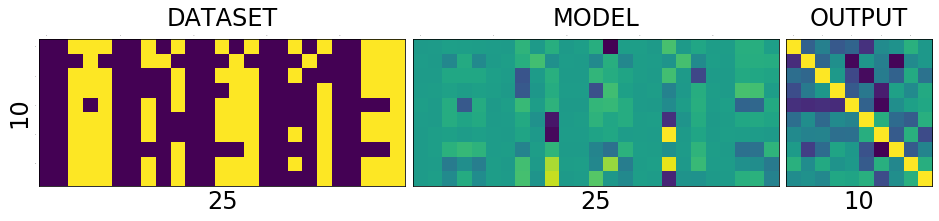

correct: 10/10, loss:0.00014499104872811586


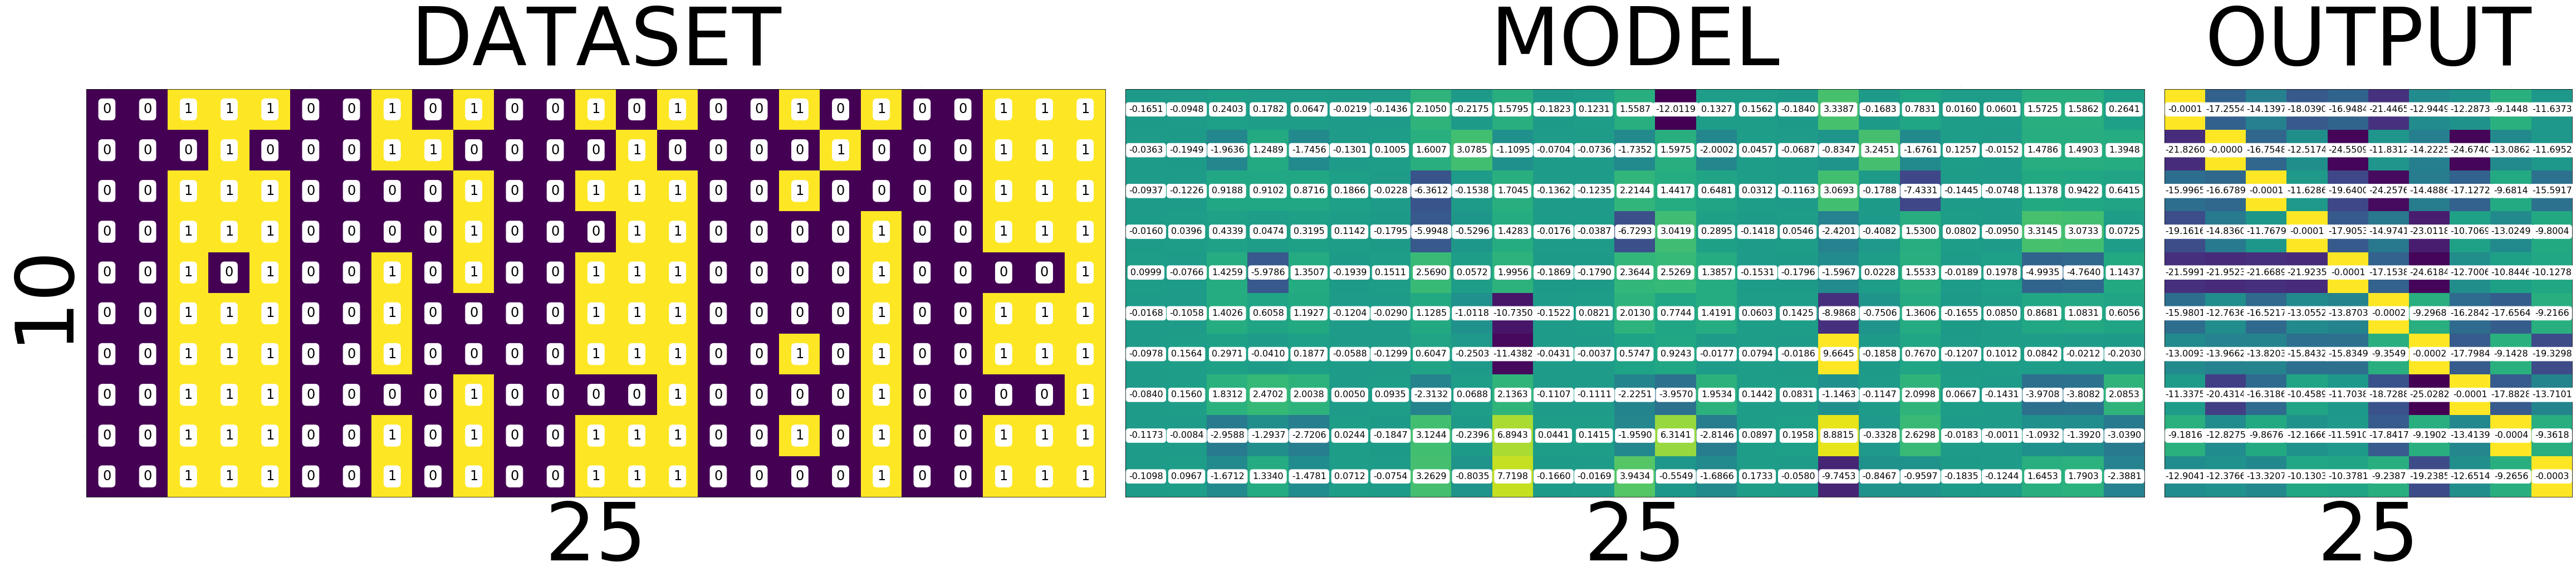

In [91]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

As you can see the diagonal of the output matrix is getting brighter and brighter. 

That is what we want right?  For each number, say for number
0. the first square in first row should be the brightest one.
1. the second square in second row should be the brightest one
2. the third square in third row should be the brightest one and so on.

Lets see the numbers directly.

In [32]:
print(data)
print(model.output_layer.weight.data)
print(output.data)



Columns 0 to 12 
    0     0     1     1     1     0     0     1     0     1     0     0     1
    0     0     0     1     0     0     0     1     1     0     0     0     0
    0     0     1     1     1     0     0     0     0     1     0     0     1
    0     0     1     1     1     0     0     0     0     1     0     0     0
    0     0     1     0     1     0     0     1     0     1     0     0     1
    0     0     1     1     1     0     0     1     0     0     0     0     1
    0     0     1     1     1     0     0     1     0     0     0     0     1
    0     0     1     1     1     0     0     0     0     1     0     0     0
    0     0     1     1     1     0     0     1     0     1     0     0     1
    0     0     1     1     1     0     0     1     0     1     0     0     1

Columns 13 to 24 
    0     1     0     0     1     0     1     0     0     1     1     1
    1     0     0     0     0     1     0     0     0     1     1     1
    1     1     0     0     1     0   

### Train over multiple epochs
means run over the all the samples multiple times.

In [33]:
def train_epochs(epochs, model, optim, dataset, print_every=10):
    snaps = []
    for epoch in range(epochs+1):
        avg_loss = train(model, optim, dataset)
        if not epoch % print_every:
            print('\n\n========================================================')
            print('epoch: {}, loss:{}'.format(epoch, avg_loss/len(dataset)/10))
            snaps.append(test_and_print(model, dataset))
            
    return snaps

In [36]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.1)

Lets train for 100 epochs and see how the model evolves. We see that in the output image, the diagonal get brigher and brighter and some other pixels getting darker and darker. It appears to be smoothing over time. Also see that after just 10 epochs the network predicts 9/10 correctly and then after 20 epochs it mastered the task, predicting 10/10 all the time. But we already know that is what we want and we know why. Lets focus on the model now, because that is where the secret lies. 



epoch: 0, loss:1.4501814112009015e-06


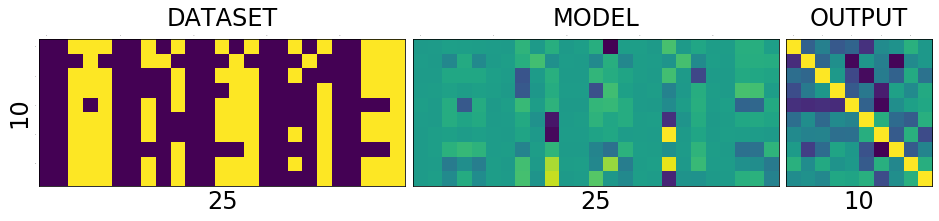

correct: 10/10, loss:0.00014498960808850825


epoch: 2, loss:1.450152380130021e-06


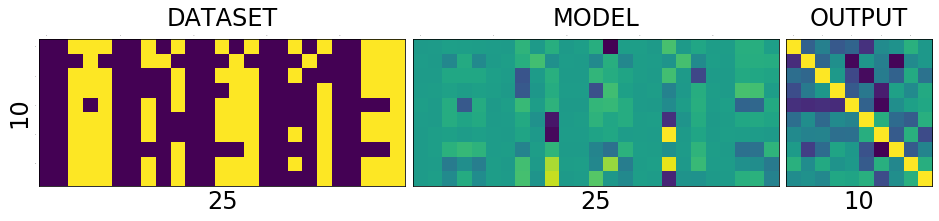

correct: 10/10, loss:0.00014498668315354735


epoch: 4, loss:1.4501219484372997e-06


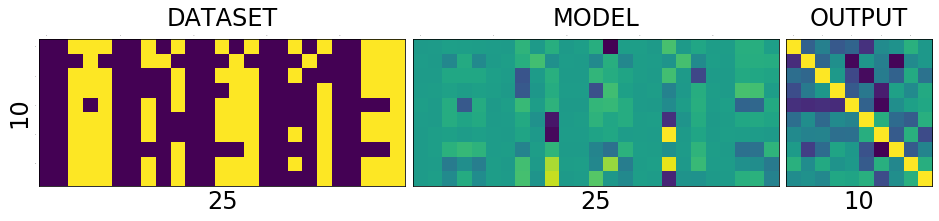

correct: 10/10, loss:0.0001449837873224169


epoch: 6, loss:1.450092448067153e-06


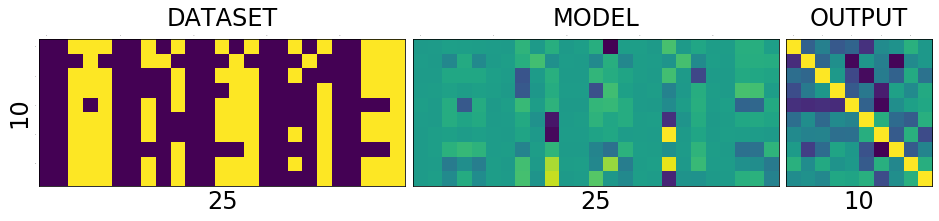

correct: 10/10, loss:0.000144980862387456


epoch: 8, loss:1.4500642791972494e-06


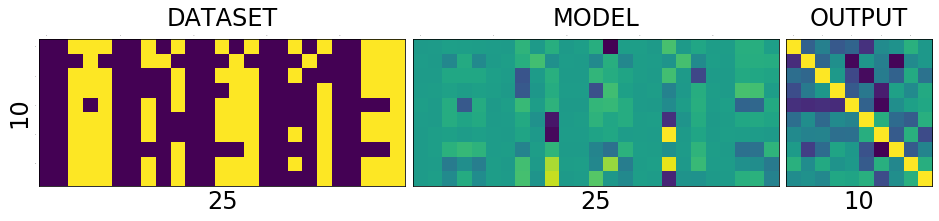

correct: 10/10, loss:0.00014497790834866464


epoch: 10, loss:1.4500360393867595e-06


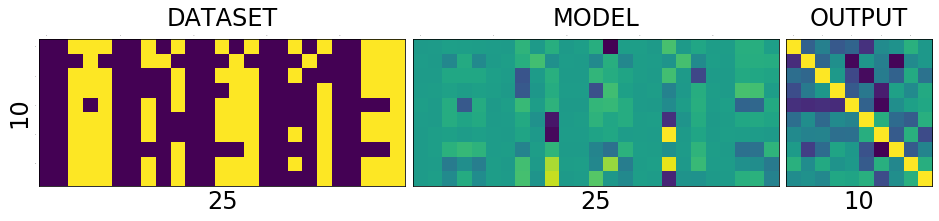

correct: 10/10, loss:0.00014497502706944942


epoch: 12, loss:1.4500053985102567e-06


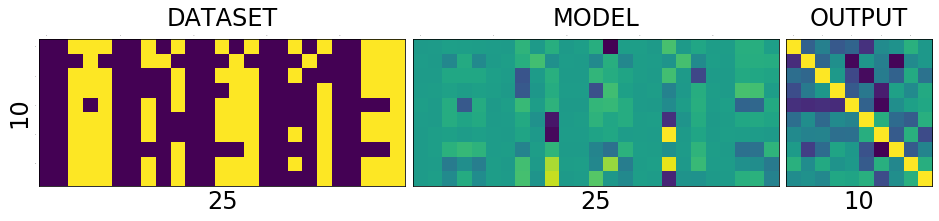

correct: 10/10, loss:0.00014497202937491238


epoch: 14, loss:1.4499763874482597e-06


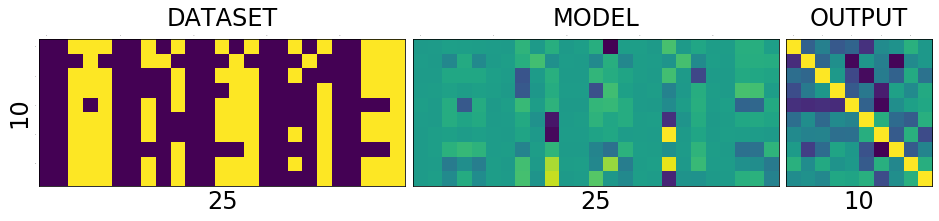

correct: 10/10, loss:0.00014496919175144285


epoch: 16, loss:1.4499478256766453e-06


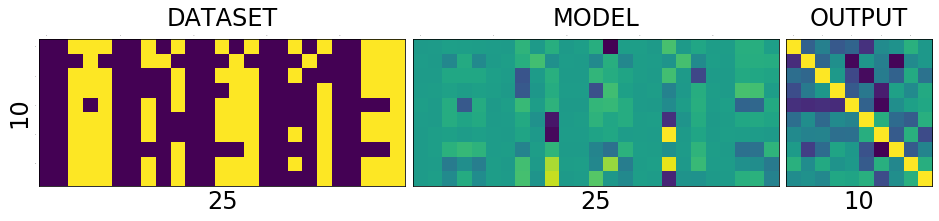

correct: 10/10, loss:0.0001449662959203124


epoch: 18, loss:1.4499189601338001e-06


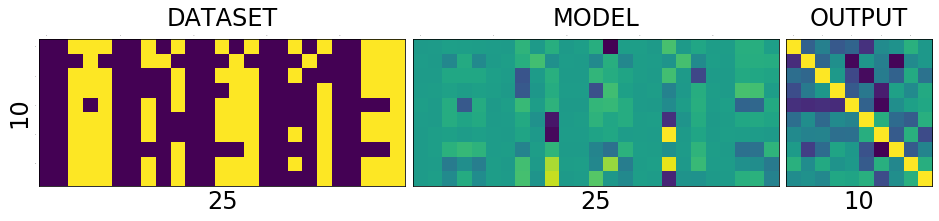

correct: 10/10, loss:0.00014496334188152105


epoch: 20, loss:1.4498886757792207e-06


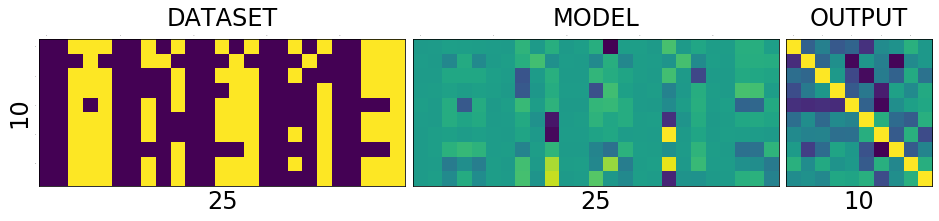

correct: 10/10, loss:0.0001449604460503906


In [92]:
snaps = train_epochs(20, model, optimizer, dataset, print_every=2)

Lets put all those picture above into a single one to get a big picture

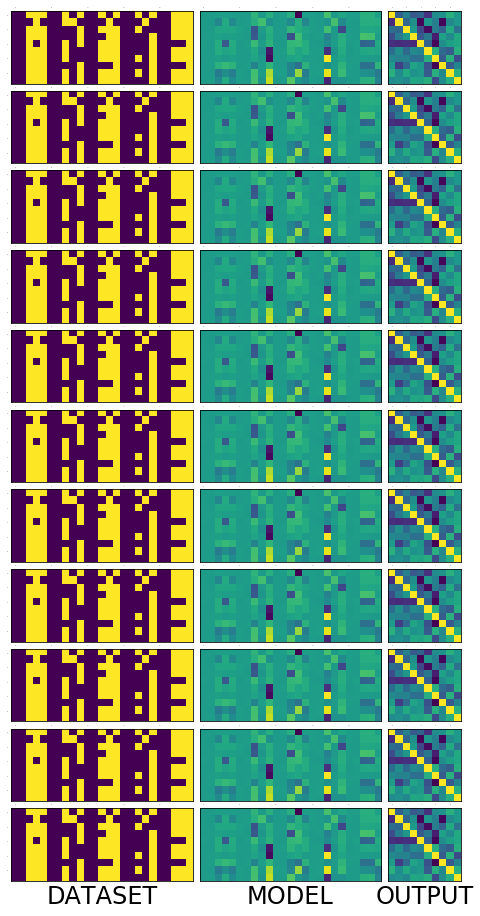

In [94]:
fig = plt.figure(1, (16., 16.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(snaps) , 3),
                     axes_pad=0.1)

for i, snap in enumerate(snaps):
    for j, image in enumerate(snap):
        grid[i * 3 + j].matshow(image)
        grid[i * 3 + j].tick_params(axis='both', which='both', length=0, labelsize=0)

        
grid[i * 3 + 0].set_xlabel('DATASET', fontsize=24)
grid[i * 3 + 1].set_xlabel('MODEL', fontsize=24)
grid[i * 3 + 2].set_xlabel('OUTPUT', fontsize=24)
        
plt.show()

But before that, lets train it for few thousand epochs so the network get more clear picture of the data :)



epoch: 0, loss:1.4498750115308211e-06


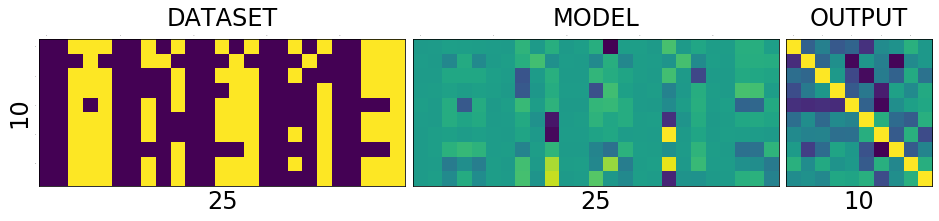

correct: 10/10, loss:0.00014495903451461345


epoch: 20000, loss:1.208880294143455e-06


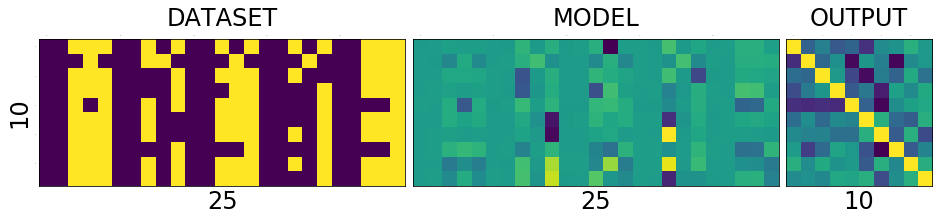

correct: 10/10, loss:0.00012086816423106939


epoch: 40000, loss:1.0348612140660406e-06


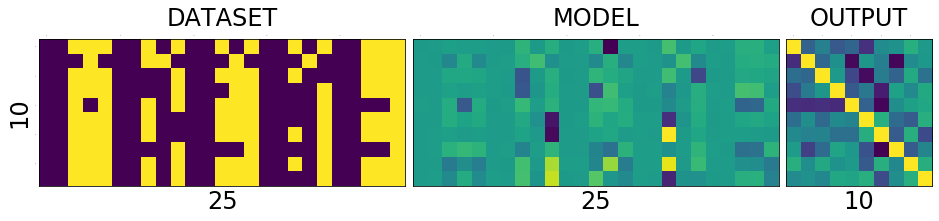

correct: 10/10, loss:0.00010347158968215808


epoch: 60000, loss:9.051171509781853e-07


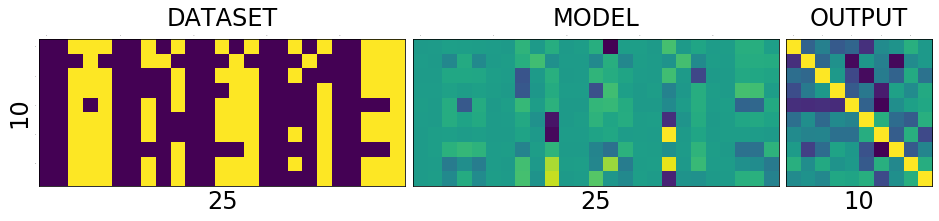

correct: 10/10, loss:9.050057269632816e-05


epoch: 80000, loss:8.033949961827602e-07


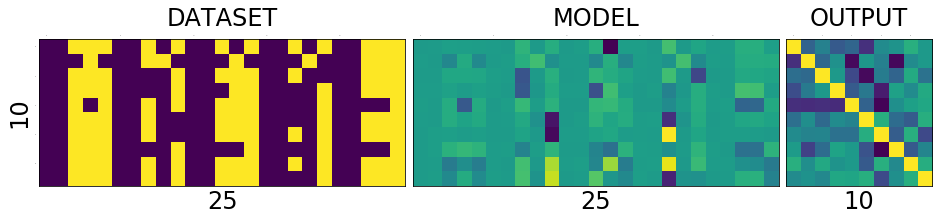

correct: 10/10, loss:8.033076301217079e-05


epoch: 100000, loss:7.233138294395757e-07


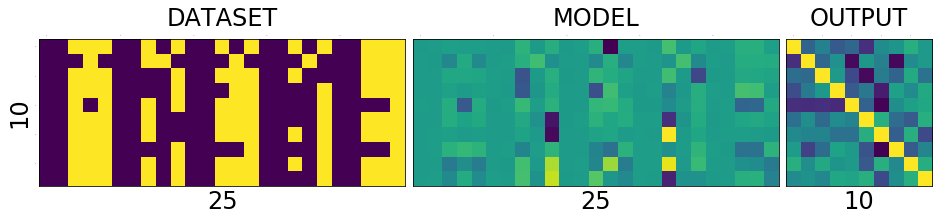

correct: 10/10, loss:7.232431380543858e-05


In [102]:
snaps = train_epochs(100000, model, optimizer, dataset, print_every=20000)

In [158]:
torch.save(model.state_dict(), 'model_100000.pth')

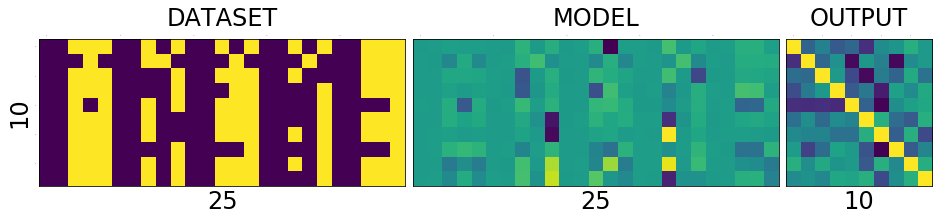

correct: 10/10, loss:7.232431380543858e-05


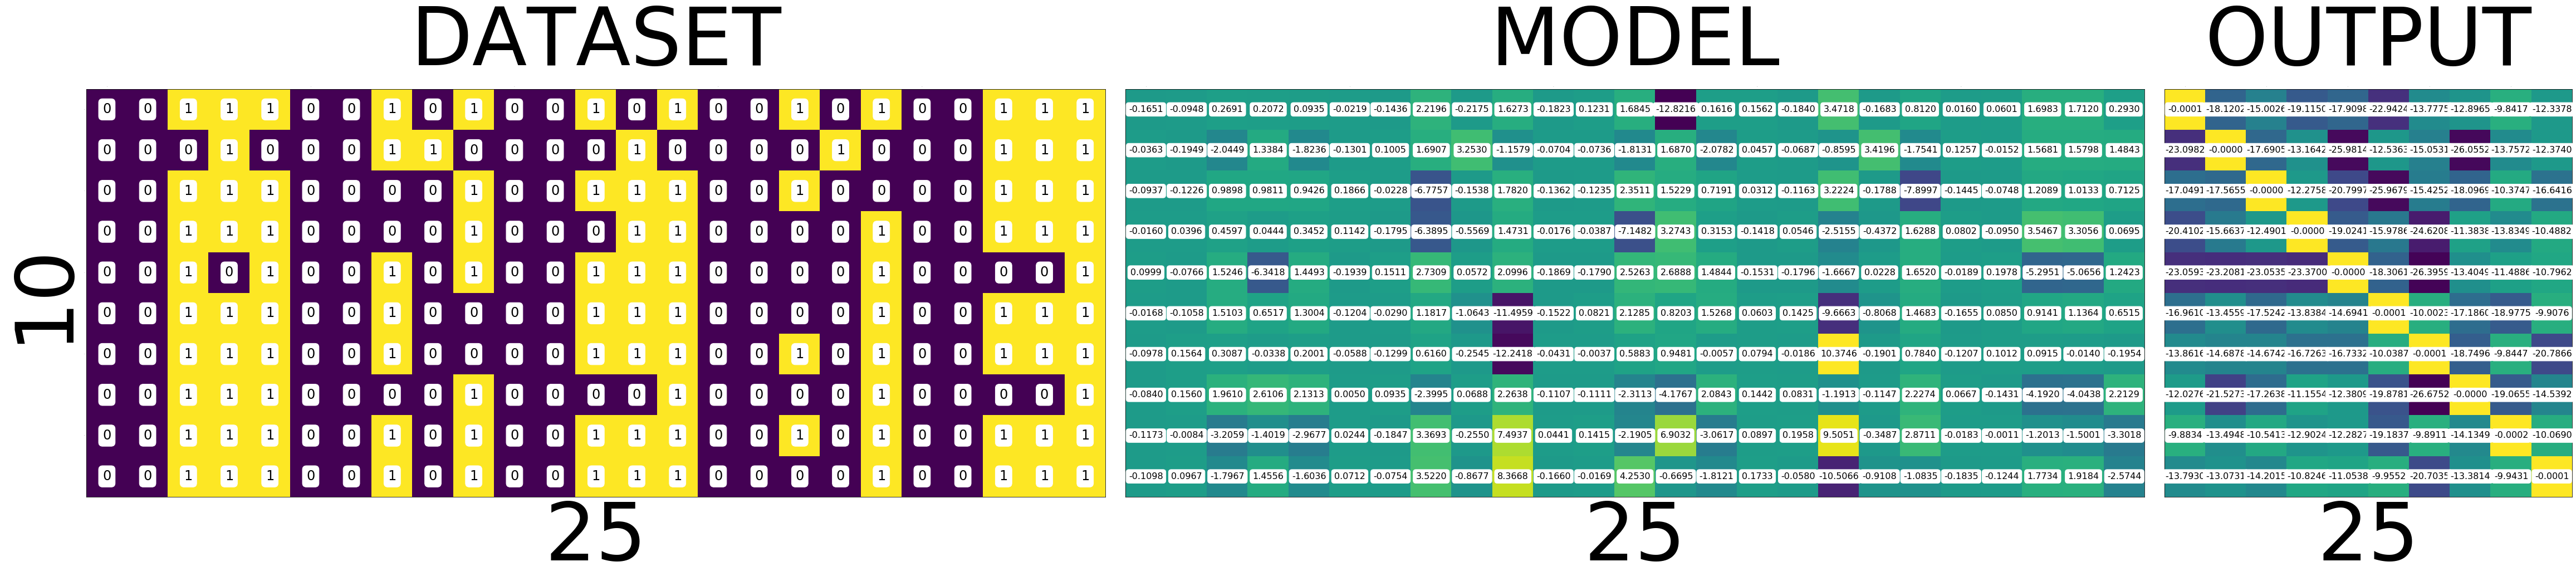

In [103]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

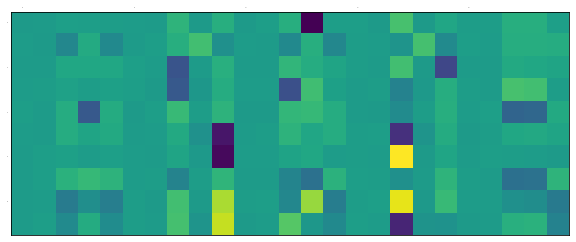

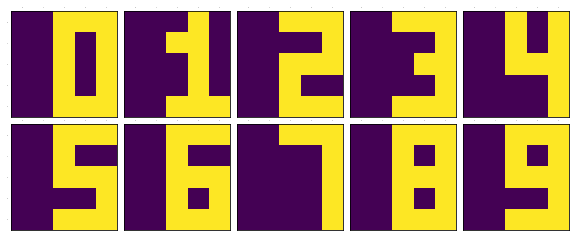

In [101]:
_model = model.output_layer.weight.data.numpy()
plt.figure(1, (25, 10))
plt.matshow(_model)
plt.tick_params(axis=u'both', which=u'both',length=0, labelsize=0)
plt.show()

fig = plt.figure(1,(10., 10.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (data, target) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(data.numpy()))
    grid[i].tick_params(axis=u'both', which=u'both',length=0, labelsize=0)
    #grid[i].locator_params(axis=u'both', tight=None)

plt.show()

## Dive into the model

At first look, the bright differentiating spots belongs to 5, 6 and 8, 9 pairs. 

* Take 8 and 9, the last two rows, the squares at index 17 are clearly at extremes. To understand why look at the 17th pixel in images of 8 and 9. That is the only pixel distinguishing 8 and 9.
* Take 5 and 6, the same 17th pixel makes all the difference.

Now you may ask why the rows in model matrix corresponding to 8 and 9 are exactly same except for that one single pixel.  I will let you ponder over that point for a while.